# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import linregress
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [6]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

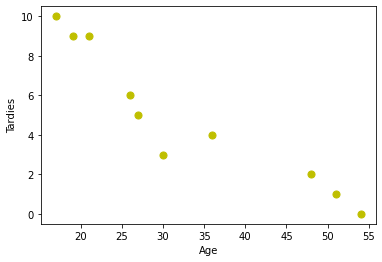

In [19]:
# Your code here.
student_data.plot.scatter(x='Age', y='Tardies', c='y', s=50)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [15]:
# Your response here. 
#The younger the student is the later he gets to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
# Your response here.
student_data[['Age', 'Tardies']].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [17]:
student_data[['Age', 'Tardies']].corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
#The age and tardies are correlated, when he age is high the tardies is low . The correlation is negative because when the age is low the tardie is low too.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [26]:
# Your response here.

slope, intercept, r_value, p_value, std_err = linregress(student_data.Age, student_data.Tardies)

In [27]:
print("Slope: {}, intercept: {}, r squared: {},\n p value: {}, std err: {}".format(slope, intercept, r_value**2, p_value, std_err))

Slope: -0.2428207709159808, intercept: 12.888803363135768, r squared: 0.8820265558250108,
 p value: 5.56665383455343e-05, std err: 0.03139728816158607


###### another method for regression model

In [37]:
x = sm.add_constant(student_data['Age'])
y = student_data['Tardies']
linear_reg = sm.OLS (y, x).fit()

In [31]:
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           5.57e-05
Time:                        19:09:52   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\USUARIO\anaconda4\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
# Commentig the results

#The model shows that R^2 is 88% (variation), so the model is acceptable according to the analyzed data. 
#P-value is less than 5%, so the null hypothesis can be rejected.
#The equation of our model is Tardies = 12.89 - Age*0.243 (y = 12.89 - x*0.243)


Plot your regression model on your scatter plot.

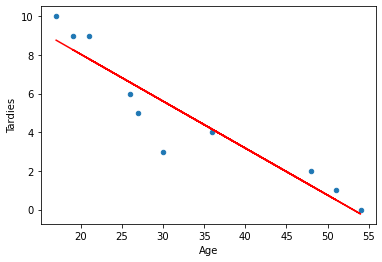

In [45]:
# Your code here.
student_data.plot('Age','Tardies',kind='scatter')
plt.plot(student_data.Age,intercept+slope*student_data.Age,color='red')

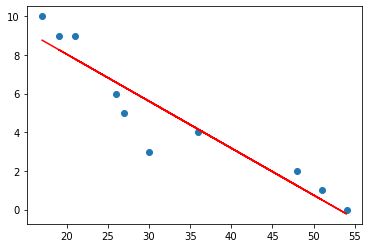

In [46]:
plt.scatter(student_data.Age, student_data.Tardies)
plt.plot(student_data.Age, linear_reg.predict(x),color='red')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [47]:
# Your response here. 
#Although R^2 = 88% is not 100% the variation of the model is low, so the model is good.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [51]:
# Import any libraries you may need & the data
df=pd.read_csv('vehicles.csv')
df.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


In [50]:
df.shape

(35952, 15)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [53]:
# Your response here. 
correlation = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
correlation

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


<AxesSubplot:>

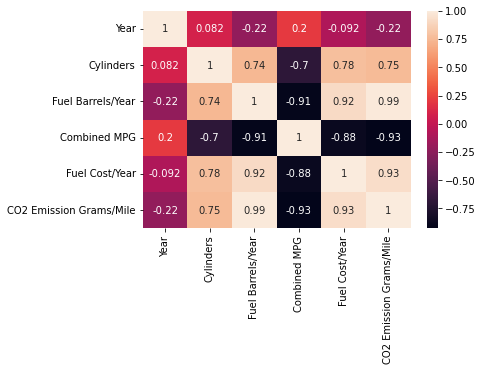

In [57]:
sns.heatmap(correlation, annot=True)

###### The variables thata are the most important in determining CO2 emissions are Fuel Cost/Year, Fuel Barrels/Year	and Cylinders.
###### The variables the provides the least amount of helpful information are Year and Combined MPG

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [64]:
# Your response here. 

corr_vehicles2 = df[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]
X = sm.add_constant(corr_vehicles2)
y = df['CO2 Emission Grams/Mile']
linear_reg_1 = sm.OLS(y,X).fit()
prediction = linear_reg_1.predict(X)



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [63]:
# Your response here. 
print(linear_reg_1.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                             20:08:28   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

###### The R^2 is 98% which is almost 1, so the variation is low. The P-value is 0 so I can clonclude that the model is good.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [1]:
# Your code here. 
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]

In [5]:
df=pd.DataFrame({'X':[1,3,4,6,8,9,11,14],'Y':[1,2,4,4,5,7,8,13]})
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

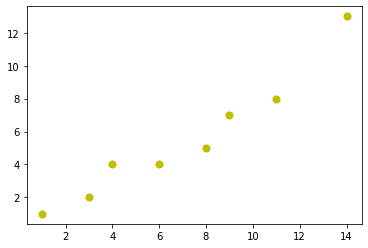

In [6]:
# Your code here.
plt.scatter(X, Y, color='y', s=50)

In [15]:
slope, intercept, r_value, p_value, std_err = linregress(df.X, df.Y)

Text(0, 0.5, 'Attended')

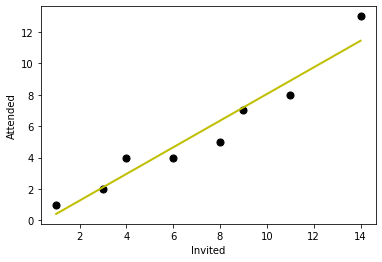

In [18]:
df.plot('X','Y',kind='scatter',color='k', s=50,)
plt.plot(df.X,intercept+slope*df.X, c='y', lw= 2, label= 'model')
plt.xlabel('Invited')
plt.ylabel('Attended')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
# Your response here. 
# I can see a relation between the variables. Both variebles show a result according to the change of each other.

In [40]:
print("R^2: {}\np-value: {}".format(r_value**2, p_value))

R^2: 0.9433811802232854
p-value: 0.0002644056885656864


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [36]:
# X=14, Y=13

In [35]:
# Your response here. 
X_1 = [1,3,4,6,8,9,11]
Y_1 = [1,2,4,4,5,7,8,]

In [28]:
df1=pd.DataFrame({'X_1':[1,3,4,6,8,9,11],'Y_1':[1,2,4,4,5,7,8]})
df1

,X_1,Y_1
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [31]:
slope, intercept, r_value, p_value, std_err = linregress(df1.X_1, df1.Y_1)

Text(0, 0.5, 'Attended')

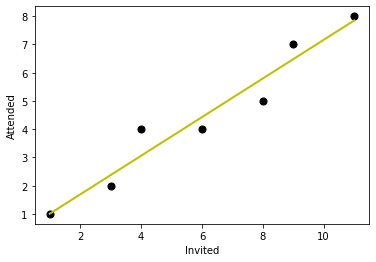

In [34]:
df1.plot('X_1','Y_1',kind='scatter',color='k', s=50,)
plt.plot(df1.X_1,intercept+slope*df1.X_1, c='y', lw= 2, label= 'model')
plt.xlabel('Invited')
plt.ylabel('Attended')

In [38]:
print("R^2: {}\np-value: {}".format(r_value**2, p_value))

R^2: 0.9433811802232854
p-value: 0.0002644056885656864


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#I do not see a big change in the two models, but a discordant observation can affect a model.

#An outlier is a single data point that goes far outside the average value of a group of statistics. 
#Outliers may be exceptions that stand outside individual samples of populations as well.
#In a more general context, an outlier is an individual that is markedly different from the norm in some respect.